In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.constants as ct
from scipy import integrate
plt.style.use('default')
from matplotlib import lines
from matplotlib import collections  as mc
import seaborn as sns
# sns.set_theme()
# sns.set_style("whitegrid")

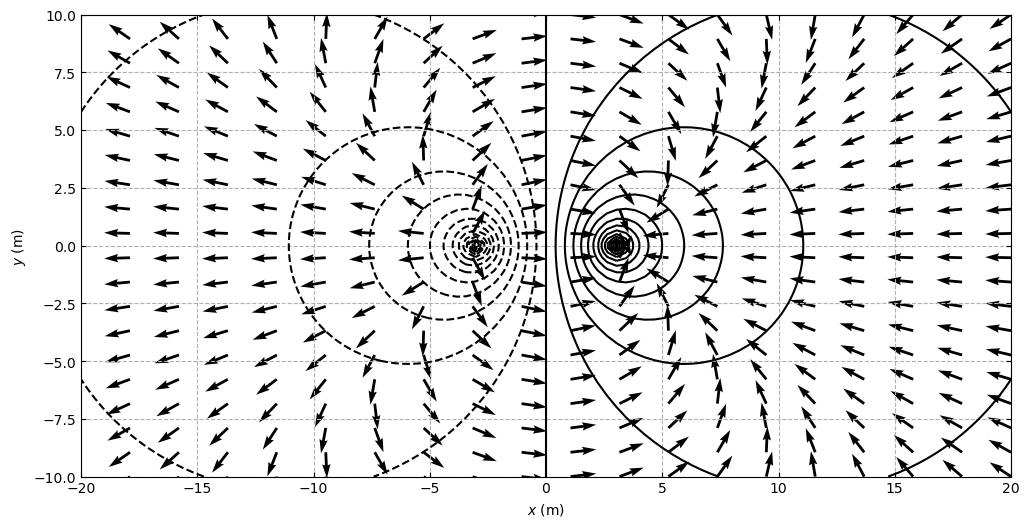

In [52]:
#Fils
def V2(x, y):
    r0=1
    L=1
    r=np.sqrt(x**2+y**2)
    V=L/(2*np.pi*ct.epsilon_0)*np.log(r0/r)

    return V
def V1(x, y):
    r0=1
    L=-1
    r=np.sqrt(x**2+y**2)
    V=L/(2*np.pi*ct.epsilon_0)*np.log(r0/r)

    return V
nx, ny = 100,100
a=10
b=20
d=3
x = np.linspace(-b, b, nx)
y = np.linspace(-a, a, ny)
X, Y = np.meshgrid(x, y)
#ELS BOONS
Z1=V1(X+d,Y)
Z2=V2(X-d,Y)

# Z1=V1(X+d,Y)
# Z2=V1(X-d,Y)
# Z3=V2(X,Y+d)
# Z4=V2(X,Y-d)
#Gràfics

fig, ax = plt.subplots(figsize=(12, 6))


ax.contour(X,Y,Z1+Z2,30,colors='black')
ax.tick_params(direction='in',top="true",right='true')
ax.grid(linestyle='dashed')
ax.set_xlabel("$x$ (m)")
ax.set_ylabel("$y$ (m)")

# dx,dy=np.gradient(Z1+Z2)
# ax.quiver(X, Y, dx,dy,units='xy')

nnx=20
nny=20
xx = np.linspace(-b, b, nnx)
yy = np.linspace(-a, a, nny)


XX, YY = np.meshgrid(xx, yy)
#ELS BONS
ZZ1=V1(XX+d,YY)
ZZ2=V2(XX-d,YY)
# ZZ1=V1(XX+d,YY)
# ZZ2=V1(XX-d,YY)
# ZZ1=V2(XX,YY+d)
# ZZ2=V2(XX,YY-d)


G=np.gradient(ZZ1+ZZ2)
norms=np.linalg.norm(G,axis=0)
Grad=[np.where(norms==0,0,i/norms) for i in G]
dx=Grad[0]
dy=Grad[1]
plt.quiver(XX, YY,dy,dx)
# 
plt.show()
fig.savefig('fils.pdf')
# ax.grid?
# plt.tick_params(labeltop=True, labelright=True)


# plt.contour(X,Y,Z1+Z2,20,colors='black')
# plt.show()


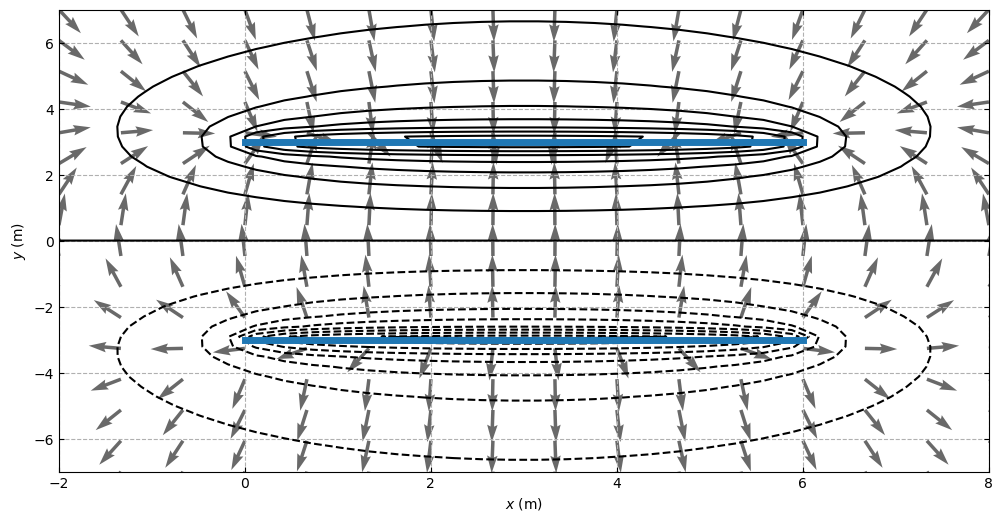

In [42]:
#Condensador
h=3
dd=6
# gg=0.01
L=1
k=1/(4*np.pi*ct.epsilon_0)
def aV1(x, y):
    V=integrate.quad(lambda d: k*L/(np.sqrt((x-d)**2+(y-h)**2)), 0, dd)
    return V[0]
def aV2(x, y):
    V=integrate.quad(lambda d: k*-L/(np.sqrt((x-d)**2+(y+h)**2)), 0, dd)
    return V[0]

nx=100
ny=nx
a=2*dd
# a=2
x = np.linspace(-a, a+dd, nx)
y = np.linspace(-a, a+dd, ny)
X, Y = np.meshgrid(x, y)

Vv1=np.vectorize(aV1)
Vv2=np.vectorize(aV2)

Z1=Vv1(X,Y)
Z2=Vv2(X,Y)
fig, ax = plt.subplots(figsize=(12, 6))


ax.contour(X,Y,Z1+Z2,15,colors='black')
aa=2
e=7
plt.xlim([-aa,dd+aa])
plt.ylim([-e,e])
# lines=[[(0,h),(dd,h)],(0,-h),(dd,-h)]
lines = [[(0, 1), (1, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)]]
x=[0,dd]
y=[h,h]
y2=[-h,-h]

ax.plot(x,y,linewidth=5,color='tab:blue')
ax.plot(x,y2,linewidth=5,color='tab:blue')
# plt.xlim([-1,12])
# plt.ylim([-5,5])
ax.tick_params(direction='in',top="true",right='true')
ax.grid(linestyle='dashed')
ax.set_xlabel("$x$ (m)")
ax.set_ylabel("$y$ (m)")




nnx=16
nny=16
xx = np.linspace(-aa, aa+dd, nnx)
yy = np.linspace(-e, e, nny)


XX, YY = np.meshgrid(xx, yy)
ZZ1=Vv1(XX,YY)
ZZ2=Vv2(XX,YY)
G=np.gradient(ZZ1+ZZ2)
norms=np.linalg.norm(G,axis=0)*2
Grad=[np.where(norms==0,0,i/norms) for i in G]
dx=Grad[0]
dy=Grad[1]
plt.quiver(XX, YY,dy,dx,color='dimgray')



# Ex,Ey=np.gradient(Z1+Z2)
# ax.quiver(X,Y,Ey,Ex)


plt.show()
fig.savefig('cond.pdf')
# Z1=V(X,Y)
# d=1
# Z2=V(X,Y-1)
#Gràfics

<ipython-input-75-96b2ea1768cf>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  V=integrate.quad(lambda d: k*L/(np.sqrt((x-d)**2+(y-h)**2)), 0, dd)
<ipython-input-75-96b2ea1768cf>:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  V=integrate.quad(lambda d: k*L/(np.sqrt((x-d)**2+(y-h)**2)), 0, dd)
<ipython-input-75-96b2ea1768cf>:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the po

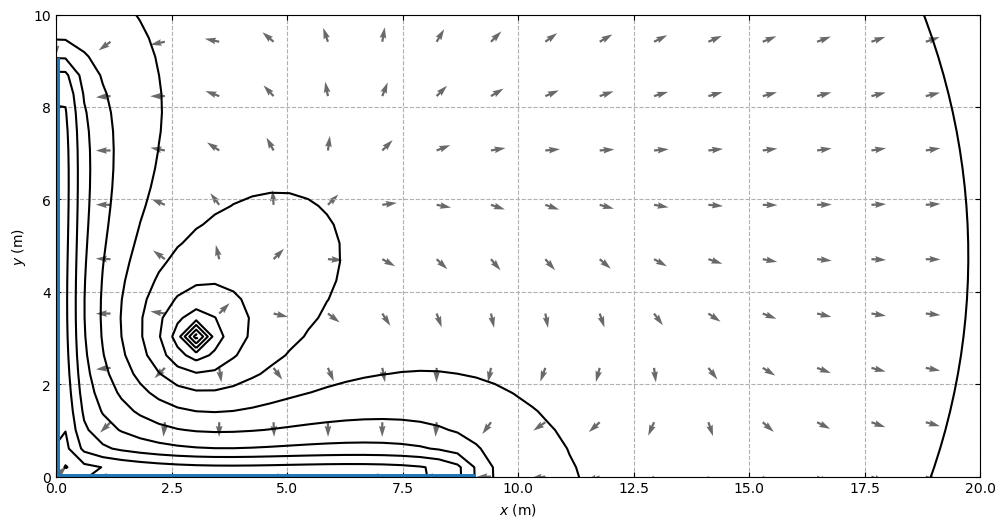

In [75]:
#Condensador
h=0
dd=9
# gg=0.01
L=1
k=1/(4*np.pi*ct.epsilon_0)
def hV1(x, y):
    V=integrate.quad(lambda d: k*L/(np.sqrt((x-d)**2+(y-h)**2)), 0, dd)
    return V[0]
def vV2(x, y):
    V=integrate.quad(lambda d: k*L/(np.sqrt((x)**2+(y-d)**2)), 0, dd)
    return V[0]

def fV(x, y):
    r0=1xº
    L=1
    r=np.sqrt(x**2+y**2)
    V=-L/(2*np.pi*ct.epsilon_0)*np.log(r0/r)

    return V

nx=100
ny=nx
x = np.linspace(-20, 20, nx)
y = np.linspace(-20,20, ny)
X, Y = np.meshgrid(x, y)

Vh=np.vectorize(hV1)
Vv=np.vectorize(vV2)
ffV=np.vectorize(fV)

m=3

Z1=Vh(X,Y)
Z2=Vv(X,Y)
Z3=ffV(X-m,Y-m)
fig, ax = plt.subplots(figsize=(12, 6))

# ax.scatter([3],[3],s=150,color='tab:red')

ax.contour(X,Y,Z1+Z2+Z3,15,colors='black')
aa=3
e=6
plt.xlim([-5,12])
plt.ylim([-5,12])



nnx=35
nny=35
xx = np.linspace(-20, 20, nnx)
yy = np.linspace(-20, 20, nny)


XX, YY = np.meshgrid(xx, yy)
ZZ1=Vh(XX,YY)
ZZ2=Vv(XX,YY)
ZZ3=ffV(XX-m,YY-m)
ZZ4=ffV
G=np.gradient(ZZ1+ZZ2+ZZ3)
norms=np.linalg.norm(G,axis=0)*2
Grad=[np.where(norms==0,0,i/norms) for i in G]
dx=Grad[0]
dy=Grad[1]
plt.quiver(XX, YY,dy,dx,color='dimgray')






ax.plot([0,dd],[0,0],linewidth=5,color='tab:blue')
ax.plot([0,0],[0,dd],linewidth=5,color='tab:blue')


ax.set_aspect('equal', 'box')
ax.tick_params(direction='in',top="true",right='true')
ax.grid(linestyle='dashed')
ax.set_xlabel("$x$ (m)")
ax.set_ylabel("$y$ (m)")


ax.set_xlim(0,b)
ax.set_ylim(0,a)
plt.show()
fig.savefig('custom.pdf')
# lines=[[(0,h),(dd,h)],(0,-h),(dd,-h)]
# lines = [[(0, 1), (1, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)]]
# x=[0,dd]
# y=[h,h]
# y2=[-h,-h]

# ax.plot(x,y)
# ax.plot(x,y2)

# Z1=V(X,Y)
# d=1
# Z2=V(X,Y-1)
#Gràfics

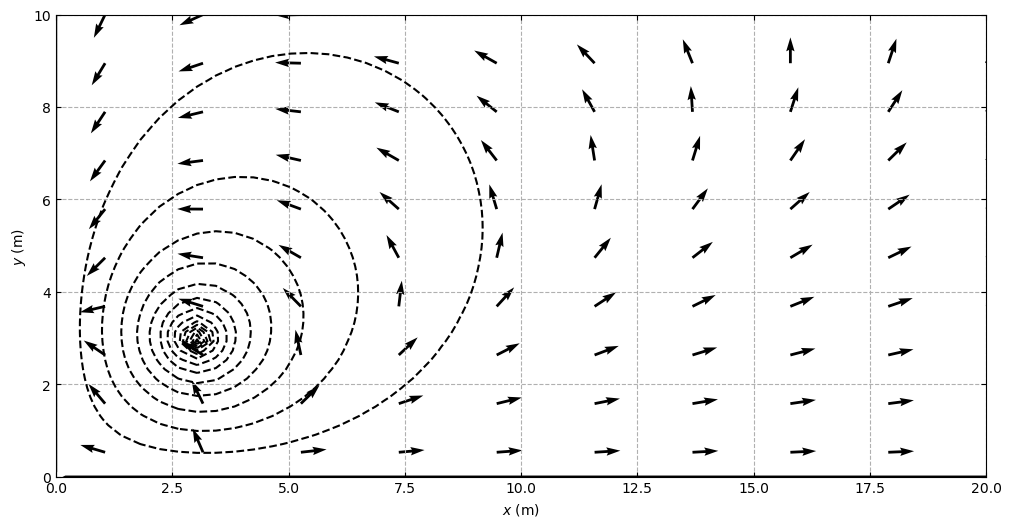

In [66]:
#Fils
def V2(x, y):
    r0=1
    L=1
    r=np.sqrt(x**2+y**2)
    V=L/(2*np.pi*ct.epsilon_0)*np.log(r0/r)

    return V
def V1(x, y):
    r0=1
    L=-1
    r=np.sqrt(x**2+y**2)
    V=L/(2*np.pi*ct.epsilon_0)*np.log(r0/r)

    return V
nx, ny = 100,100
a=10
b=20
d=3
x = np.linspace(-b, b, nx)
y = np.linspace(-a, a, ny)
X, Y = np.meshgrid(x, y)
#ELS BOONS
# Z1=V1(X+d,Y)
# Z2=V2(X-d,Y)

Z1=V1(X+d,Y+d)
Z2=V1(X-d,Y-d)
Z3=V2(X+d,Y-d)
Z4=V2(X-d,Y+d)
#Gràfics

fig, ax = plt.subplots(figsize=(12, 6))


ax.contour(X,Y,Z1+Z2+Z3+Z4,30,colors='black')
ax.tick_params(direction='in',top="true",right='true')
ax.grid(linestyle='dashed')
ax.set_xlabel("$x$ (m)")
ax.set_ylabel("$y$ (m)")

# dx,dy=np.gradient(Z1+Z2)
# ax.quiver(X, Y, dx,dy,units='xy')

nnx=20
nny=20
xx = np.linspace(-b, b, nnx)
yy = np.linspace(-a, a, nny)


XX, YY = np.meshgrid(xx, yy)
#ELS BONS
# ZZ1=V1(XX+d,YY)
# ZZ2=V2(XX-d,YY)
ZZ1=V1(XX+d,YY)
ZZ2=V1(XX-d,YY)
ZZ3=V2(XX,YY+d)
ZZ4=V2(XX,YY-d)


G=np.gradient(ZZ1+ZZ2+ZZ3+ZZ4)
norms=np.linalg.norm(G,axis=0)
Grad=[np.where(norms==0,0,i/norms) for i in G]
dx=Grad[0]
dy=Grad[1]
plt.quiver(XX, YY,dy,dx)
# 
ax.set_xlim(0,b)
ax.set_ylim(0,a)
plt.show()
fig.savefig('fils.pdf')
# ax.grid?
# plt.tick_params(labeltop=True, labelright=True)


# plt.contour(X,Y,Z1+Z2,20,colors='black')
# plt.show()


Building jupyterlab assets (production, minimized)
An error occured.
RuntimeError: JupyterLab failed to build
See the log file for details:  /tmp/jupyterlab-debug-9hign88m.log


<ipython-input-77-20d5d4172e14>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  V=integrate.quad(lambda d: k*L/(np.sqrt((x-d)**2+(y-h)**2)), 0, dd)
<ipython-input-77-20d5d4172e14>:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  V=integrate.quad(lambda d: k*L/(np.sqrt((x-d)**2+(y-h)**2)), 0, dd)
<ipython-input-77-20d5d4172e14>:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the po

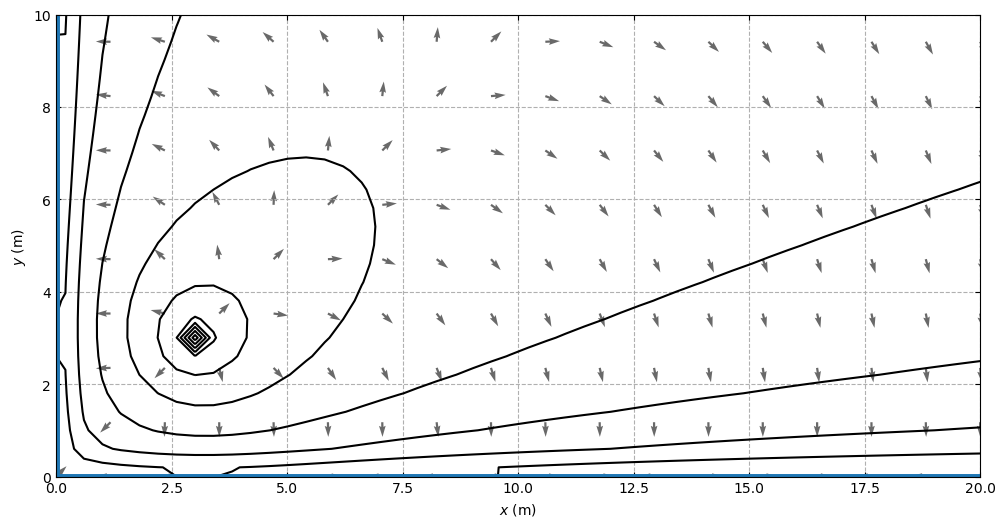

In [77]:
#Condensador
h=0
dd=100
# gg=0.01
L=1
k=1/(4*np.pi*ct.epsilon_0)
def hV1(x, y):
    V=integrate.quad(lambda d: k*L/(np.sqrt((x-d)**2+(y-h)**2)), 0, dd)
    return V[0]
def vV2(x, y):
    V=integrate.quad(lambda d: k*L/(np.sqrt((x)**2+(y-d)**2)), 0, dd)
    return V[0]

def fV(x, y):
    r0=1
    L=1
    r=np.sqrt(x**2+y**2)
    V=-L/(2*np.pi*ct.epsilon_0)*np.log(r0/r)

    return V

nx=500
ny=nx
ddx=dd
x = np.linspace(-ddx, ddx, nx)
y = np.linspace(-ddx,ddx, ny)
X, Y = np.meshgrid(x, y)

Vh=np.vectorize(hV1)
Vv=np.vectorize(vV2)
ffV=np.vectorize(fV)

m=3

Z1=Vh(X,Y)
Z2=Vv(X,Y)
Z3=ffV(X-m,Y-m)
fig, ax = plt.subplots(figsize=(12, 6))

# ax.scatter([3],[3],s=150,color='tab:red')

ax.contour(X,Y,Z1+Z2+Z3,15,colors='black')
aa=3
e=6
plt.xlim([-5,12])
plt.ylim([-5,12])



nnx=35
nny=35
xx = np.linspace(-20, 20, nnx)
yy = np.linspace(-20, 20, nny)


XX, YY = np.meshgrid(xx, yy)
ZZ1=Vh(XX,YY)
ZZ2=Vv(XX,YY)
ZZ3=ffV(XX-m,YY-m)
ZZ4=ffV
G=np.gradient(ZZ1+ZZ2+ZZ3)
norms=np.linalg.norm(G,axis=0)*2
Grad=[np.where(norms==0,0,i/norms) for i in G]
dx=Grad[0]
dy=Grad[1]
plt.quiver(XX, YY,dy,dx,color='dimgray')






ax.plot([0,dd],[0,0],linewidth=5,color='tab:blue')
ax.plot([0,0],[0,dd],linewidth=5,color='tab:blue')


ax.set_aspect('equal', 'box')
ax.tick_params(direction='in',top="true",right='true')
ax.grid(linestyle='dashed')
ax.set_xlabel("$x$ (m)")
ax.set_ylabel("$y$ (m)")


ax.set_xlim(0,b)
ax.set_ylim(0,a)
plt.show()
fig.savefig('custom.pdf')
# lines=[[(0,h),(dd,h)],(0,-h),(dd,-h)]
# lines = [[(0, 1), (1, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)]]
# x=[0,dd]
# y=[h,h]
# y2=[-h,-h]

# ax.plot(x,y)
# ax.plot(x,y2)

# Z1=V(X,Y)
# d=1
# Z2=V(X,Y-1)
#Gràfics